In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-03-30 13:13:10.387931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
com='META'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end)
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497986,49501700,APPLE
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024460,68749800,APPLE
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200,APPLE
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750626,46278300,APPLE
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE
...,...,...,...,...,...,...,...
2024-03-22,176.300003,177.500000,175.080002,175.149994,175.149994,5459000,GENERAL_ELC
2024-03-25,174.660004,175.509995,172.789993,173.490005,173.490005,5018500,GENERAL_ELC
2024-03-26,173.490005,175.050003,172.399994,173.550003,173.550003,4035900,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497986,49501700,APPLE
1,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024460,68749800,APPLE
2,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200,APPLE
3,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750626,46278300,APPLE
4,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE
...,...,...,...,...,...,...,...,...
2505,2024-03-22,176.300003,177.500000,175.080002,175.149994,175.149994,5459000,GENERAL_ELC
2506,2024-03-25,174.660004,175.509995,172.789993,173.490005,173.490005,5018500,GENERAL_ELC
2507,2024-03-26,173.490005,175.050003,172.399994,173.550003,173.550003,4035900,GENERAL_ELC
2508,2024-03-27,175.020004,180.360001,174.679993,180.119995,180.119995,10061000,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
com='META'
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497986,49501700,APPLE
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024460,68749800,APPLE
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200,APPLE
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750626,46278300,APPLE
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE
...,...,...,...,...,...,...,...
2024-03-22,176.300003,177.500000,175.080002,175.149994,175.149994,5459000,GENERAL_ELC
2024-03-25,174.660004,175.509995,172.789993,173.490005,173.490005,5018500,GENERAL_ELC
2024-03-26,173.490005,175.050003,172.399994,173.550003,173.550003,4035900,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2147

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.5236106 ],
       [-0.51532162],
       [-0.5111771 ],
       ...,
       [-0.48709328],
       [-0.46565285],
       [-0.48063179]])

In [16]:
train_set, test_set = scaled_data[:training_data_len], scaled_data[training_data_len:]

In [17]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-30,203.380005,208.089996,202.820007,207.839996,207.619705,22608300,META
2023-03-31,207.240005,212.169998,206.770004,211.940002,211.715363,25440300,META
2023-04-03,208.839996,213.490005,208.199997,213.070007,212.844177,17924600,META
2023-04-04,213.389999,216.240005,212.539993,214.720001,214.492416,21026400,META
2023-04-05,214.149994,215.190002,209.940002,211.479996,211.255844,19396600,META
...,...,...,...,...,...,...,...
2024-03-22,507.000000,509.970001,504.339996,509.579987,509.579987,8117000,META
2024-03-25,505.790009,507.220001,500.239990,503.019989,503.019989,8380600,META
2024-03-26,505.130005,510.000000,495.209991,495.890015,495.890015,11205400,META


In [18]:
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [19]:
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction

In [20]:
residuals.shape

(112, 112)

In [21]:
X_train = residuals[:-1].reshape(-1, 1)  
y_train = residuals[1:].reshape(-1, 1) 

In [22]:
X_train

array([[-0.00808581],
       [-0.00807348],
       [-0.00808259],
       ...,
       [ 0.22868253],
       [ 0.22868253],
       [ 0.22868253]])

In [23]:
y_train.shape

(12432, 1)

In [24]:
ann_model = Sequential()
ann_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(loss='mean_squared_error', optimizer='adam')
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [25]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = ann_model.fit(X_train, y_train, batch_size=1, epochs=1)

12432/12432 [==============================] - 7s 545us/step - loss: 4.1359e-05


In [27]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [28]:
dataset

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [29]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Date,
2023-10-18,107.570000
2023-10-19,106.949997
2023-10-20,106.080002
2023-10-23,106.690002
2023-10-24,113.620003
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [30]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [31]:
x_test = np.array(x_test)

In [32]:
x_test

array([[-0.67111573, -0.67907841, -0.67679405, ..., -0.69650491,
        -0.69728812, -0.69441635],
       [-0.67907841, -0.67679405, -0.68015533, ..., -0.69728812,
        -0.69441635, -0.70241164],
       [-0.67679405, -0.68015533, -0.68064485, ..., -0.69441635,
        -0.70241164, -0.70443495],
       ...,
       [-0.63469631, -0.63694808, -0.64243057, ..., -0.47700942,
        -0.48187189, -0.48728908],
       [-0.63694808, -0.64243057, -0.64859837, ..., -0.48187189,
        -0.48728908, -0.48709328],
       [-0.64243057, -0.64859837, -0.64664032, ..., -0.48728908,
        -0.48709328, -0.46565285]])

In [33]:
x_test_mean_array = []
for sub in x_test:
    x_test_mean = np.mean(sub)
    x_test_mean_array.append(x_test_mean)

In [34]:
predictions = ann_model.predict(x_test_mean_array)
predictions

4/4 [==============================] - 0s 1ms/step


array([[-0.37654093],
       [-0.37681523],
       [-0.3770375 ],
       [-0.37730452],
       [-0.37752476],
       [-0.3775426 ],
       [-0.37760028],
       [-0.37769094],
       [-0.37786278],
       [-0.37795576],
       [-0.37813023],
       [-0.3783104 ],
       [-0.378436  ],
       [-0.37856898],
       [-0.37864956],
       [-0.3787568 ],
       [-0.3787568 ],
       [-0.37877056],
       [-0.37864736],
       [-0.3785406 ],
       [-0.37839106],
       [-0.37825832],
       [-0.37810197],
       [-0.37784764],
       [-0.37761602],
       [-0.37744644],
       [-0.37732437],
       [-0.37716243],
       [-0.37700495],
       [-0.37687305],
       [-0.37670192],
       [-0.3764411 ],
       [-0.37613484],
       [-0.37585428],
       [-0.37568352],
       [-0.37554595],
       [-0.37537786],
       [-0.37523648],
       [-0.37509963],
       [-0.37493518],
       [-0.37479296],
       [-0.37460706],
       [-0.37431428],
       [-0.3739598 ],
       [-0.37355313],
       [-0

In [35]:
len(predictions)

112

In [36]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [37]:
predictions = scaler.inverse_transform(predictions)

In [38]:
mse = np.mean(predictions -f_app)
mse

-13.976814244244549

In [39]:
predictions

array([[207.42656],
       [207.34251],
       [207.2744 ],
       [207.19258],
       [207.12509],
       [207.11963],
       [207.10194],
       [207.07417],
       [207.02151],
       [206.99301],
       [206.93956],
       [206.88434],
       [206.84586],
       [206.80511],
       [206.78041],
       [206.74756],
       [206.74756],
       [206.74333],
       [206.7811 ],
       [206.8138 ],
       [206.85963],
       [206.9003 ],
       [206.94821],
       [207.02615],
       [207.09712],
       [207.1491 ],
       [207.1865 ],
       [207.23611],
       [207.28438],
       [207.3248 ],
       [207.37723],
       [207.45715],
       [207.551  ],
       [207.63698],
       [207.6893 ],
       [207.73146],
       [207.78296],
       [207.82628],
       [207.86823],
       [207.91861],
       [207.96219],
       [208.01917],
       [208.10887],
       [208.2175 ],
       [208.34212],
       [208.45988],
       [208.60078],
       [208.72655],
       [208.87486],
       [209.04494],


In [40]:
import random
random.random()

0.4748984690204634

In [41]:
Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [42]:
Final_pred

array([[195.9498 ],
       [195.86575],
       [195.79764],
       [195.71582],
       [195.64833],
       [195.64287],
       [195.62518],
       [195.59741],
       [195.54475],
       [195.51625],
       [195.4628 ],
       [195.40758],
       [195.3691 ],
       [195.32835],
       [195.30365],
       [195.2708 ],
       [195.2708 ],
       [195.26657],
       [195.30434],
       [195.33704],
       [195.38287],
       [195.42354],
       [195.47145],
       [195.5494 ],
       [195.62036],
       [195.67233],
       [195.70973],
       [195.75935],
       [195.80762],
       [195.84804],
       [195.90047],
       [195.9804 ],
       [196.07423],
       [196.16022],
       [196.21254],
       [196.2547 ],
       [196.3062 ],
       [196.34952],
       [196.39146],
       [196.44185],
       [196.48543],
       [196.5424 ],
       [196.63211],
       [196.74074],
       [196.86536],
       [196.98312],
       [197.12402],
       [197.24979],
       [197.3981 ],
       [197.56818],


In [43]:
train = df_rest
data = df_app['Close'].values
len(data)

251

In [44]:
len(data[138:252])

113

In [45]:
valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
valid['Predictions'] = Final_pred

In [46]:
valid

,Close_app,Predictions
0,207.839996,195.949799
1,211.940002,195.865753
2,213.070007,195.797638
3,214.720001,195.715820
4,211.479996,195.648331
...,...,...
107,296.380005,212.398499
108,300.149994,212.816345
109,299.170013,213.213242
110,298.670013,213.609634


In [47]:
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497986,49501700,APPLE
1,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024460,68749800,APPLE
2,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200,APPLE
3,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750626,46278300,APPLE
4,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE
...,...,...,...,...,...,...,...,...
2505,2024-03-22,176.300003,177.500000,175.080002,175.149994,175.149994,5459000,GENERAL_ELC
2506,2024-03-25,174.660004,175.509995,172.789993,173.490005,173.490005,5018500,GENERAL_ELC
2507,2024-03-26,173.490005,175.050003,172.399994,173.550003,173.550003,4035900,GENERAL_ELC
2508,2024-03-27,175.020004,180.360001,174.679993,180.119995,180.119995,10061000,GENERAL_ELC


In [48]:
dfxfs = dfxf[['Date', 'Close']]
dfxfs

,Date,Close
0,2023-03-30,162.360001
1,2023-03-31,164.899994
2,2023-04-03,166.169998
3,2023-04-04,165.630005
4,2023-04-05,163.759995
...,...,...
2505,2024-03-22,175.149994
2506,2024-03-25,173.490005
2507,2024-03-26,173.550003
2508,2024-03-27,180.119995


In [49]:
dfxf['Date']

0       2023-03-30
1       2023-03-31
2       2023-04-03
3       2023-04-04
4       2023-04-05
           ...    
2505    2024-03-22
2506    2024-03-25
2507    2024-03-26
2508    2024-03-27
2509    2024-03-28
Name: Date, Length: 2510, dtype: object

In [50]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [51]:
    dfxfs.index = dfxfs.pop('Date')
    dfxfs

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [52]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

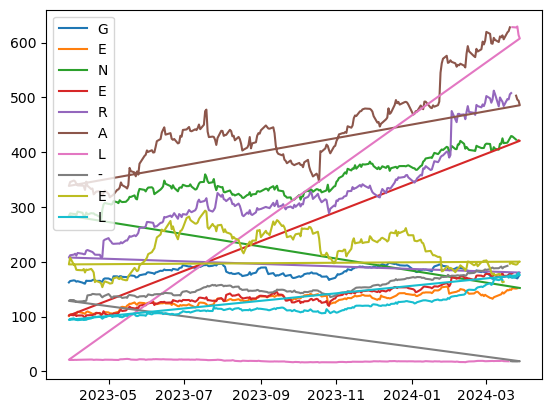

In [53]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [54]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-30,203.380005,208.089996,202.820007,207.839996,207.619705,22608300,META
2023-03-31,207.240005,212.169998,206.770004,211.940002,211.715363,25440300,META
2023-04-03,208.839996,213.490005,208.199997,213.070007,212.844177,17924600,META
2023-04-04,213.389999,216.240005,212.539993,214.720001,214.492416,21026400,META
2023-04-05,214.149994,215.190002,209.940002,211.479996,211.255844,19396600,META
...,...,...,...,...,...,...,...
2024-03-22,507.000000,509.970001,504.339996,509.579987,509.579987,8117000,META
2024-03-25,505.790009,507.220001,500.239990,503.019989,503.019989,8380600,META
2024-03-26,505.130005,510.000000,495.209991,495.890015,495.890015,11205400,META


In [55]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [56]:
    df_app_c

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [57]:
    dfxfs

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [58]:
    df_g = df_app_c
    df_g

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [59]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [60]:
dfxfs

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [61]:
df_mse_a

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [63]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index

485.5799865722656

In [64]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index
val = dfxfs_values - df_mse_a_values

values = {'Close': val}
mseallf = pd.DataFrame(values, index=index_dfxfs)


In [65]:
    mseallf

,Close
Date,
2023-03-30,-45.479996
2023-03-31,-47.040009
2023-04-03,-46.900009
2023-04-04,-49.089996
2023-04-05,-47.720001
...,...
2024-03-22,-334.429993
2024-03-25,-329.529984
2024-03-26,-322.340012


In [66]:
for i in range(1,len(dfxfs)):
    if (mseallf.iloc[i,0]>=0):
        final_df = dfxfs+mseallf
    else:
        final_df = dfxfs-mseallf
final_df

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [67]:
sdx = final_df[251:2500]
sdx

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-08,505.950012
2024-03-11,483.589996
2024-03-12,499.750000


In [68]:
datasetx = final_df.iloc[251:2500]

In [69]:
training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
training_data_lenx

2137

In [70]:
datasetx

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-08,505.950012
2024-03-11,483.589996
2024-03-12,499.750000


In [71]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_datax = scaler.fit_transform(datasetx)
scaled_datax

array([[-0.99809616],
       [-0.9711791 ],
       [-0.96376048],
       ...,
       [ 0.91832982],
       [ 0.89088764],
       [ 0.86633393]])

In [72]:
train_datax = scaled_datax[0:int(training_data_lenx), :]

In [73]:
x_trainx = []
y_trainx = []

In [74]:
for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])

In [75]:
x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

In [76]:
x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))

In [77]:
len(x_trainx)

2077

In [78]:
sdx

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-08,505.950012
2024-03-11,483.589996
2024-03-12,499.750000


In [79]:
x_trainx.shape[0]

2077

In [80]:
xtrainfinal = np.array(sdx)
xtrainfinal.shape[1]

1

In [81]:
xtrainfinal.shape[0]

2249

In [82]:
train_set, test_set = scaled_datax[:training_data_lenx], scaled_datax[training_data_lenx:]
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction
x_trainx = residuals[:-1].reshape(-1, 1)  
y_trainx = residuals[1:].reshape(-1, 1) 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/sridhar/opt/anaconda3/envs/tensorflow/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
ann_modelx = Sequential()
ann_modelx.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_modelx.add(Dense(1))
ann_modelx.compile(loss='mean_squared_error', optimizer='adam')
ann_modelx.fit(x_trainx, y_trainx, epochs=100, batch_size=10, verbose=0)

In [84]:
ann_modelx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [85]:
historyx = ann_modelx.fit(x_trainx, y_trainx, batch_size=2, epochs=1)

6216/6216 [==============================] - 3s 530us/step - loss: 0.0043


In [86]:
test_datax = scaled_datax[training_data_lenx - 60: , :]
x_testx = []

In [87]:
y_testx = datasetx[training_data_lenx:len(datasetx)]
y_testx

,Close
Date,
2023-10-04,305.579987
2023-10-05,304.790009
2023-10-06,315.429993
2023-10-09,318.359985
2023-10-10,321.839996
...,...
2024-03-08,505.950012
2024-03-11,483.589996
2024-03-12,499.750000


In [88]:
for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])

In [89]:
x_testx = np.array(x_testx)

In [90]:
x_testx

array([[-0.40428042, -0.33173586, -0.30501575, ..., -0.3916755 ,
        -0.34827991, -0.38688288],
       [-0.33173586, -0.30501575, -0.33482148, ..., -0.34827991,
        -0.38688288, -0.3564208 ],
       [-0.30501575, -0.33482148, -0.32333251, ..., -0.38688288,
        -0.3564208 , -0.36160711],
       ...,
       [-0.1649817 , -0.1752888 , -0.16379983, ...,  1.        ,
         0.95903368,  0.81223735],
       [-0.1752888 , -0.16379983, -0.10011822, ...,  0.95903368,
         0.81223735,  0.91832982],
       [-0.16379983, -0.10011822, -0.06243446, ...,  0.81223735,
         0.91832982,  0.89088764]])

In [91]:
x_test_mean_arrayx = []
for sub in x_testx:
    x_test_mean = np.mean(sub)
    x_test_mean_arrayx.append(x_test_mean)

In [92]:
predictionsx = ann_modelx.predict(x_test_mean_arrayx)
predictionsx

4/4 [==============================] - 0s 819us/step


array([[-0.34101892],
       [-0.3403628 ],
       [-0.3407724 ],
       [-0.34059048],
       [-0.33973622],
       [-0.33872628],
       [-0.33730662],
       [-0.33657312],
       [-0.33547747],
       [-0.33305717],
       [-0.33014154],
       [-0.32811618],
       [-0.32683432],
       [-0.3271097 ],
       [-0.32814217],
       [-0.32868695],
       [-0.33077335],
       [-0.3331102 ],
       [-0.33459187],
       [-0.3353182 ],
       [-0.33669472],
       [-0.33676577],
       [-0.33625615],
       [-0.33545852],
       [-0.33418393],
       [-0.33304715],
       [-0.33144212],
       [-0.32907844],
       [-0.32514668],
       [-0.3210113 ],
       [-0.31683362],
       [-0.3127731 ],
       [-0.30917692],
       [-0.3048302 ],
       [-0.299927  ],
       [-0.29572153],
       [-0.29180586],
       [-0.28792357],
       [-0.28443003],
       [-0.2805946 ],
       [-0.27770948],
       [-0.27519095],
       [-0.27283692],
       [-0.27084494],
       [-0.2698791 ],
       [-0

In [93]:
predictionsx = scaler.inverse_transform(predictionsx)

In [94]:
predictionsx

array([[307.926  ],
       [308.02594],
       [307.96356],
       [307.99127],
       [308.1214 ],
       [308.2752 ],
       [308.49146],
       [308.60318],
       [308.77005],
       [309.13873],
       [309.58286],
       [309.89136],
       [310.08658],
       [310.04465],
       [309.8874 ],
       [309.8044 ],
       [309.4866 ],
       [309.13065],
       [308.90497],
       [308.7943 ],
       [308.58466],
       [308.57385],
       [308.65146],
       [308.77298],
       [308.9671 ],
       [309.14026],
       [309.38474],
       [309.74478],
       [310.34366],
       [310.97357],
       [311.6099 ],
       [312.2284 ],
       [312.77618],
       [313.43826],
       [314.18512],
       [314.8257 ],
       [315.42212],
       [316.0135 ],
       [316.54562],
       [317.12985],
       [317.5693 ],
       [317.9529 ],
       [318.3115 ],
       [318.6149 ],
       [318.76202],
       [318.97852],
       [319.2737 ],
       [319.56207],
       [319.90442],
       [320.33865],


In [95]:
data = final_df['Close']

In [96]:
len(data)

2510

In [97]:
data

Date
2023-03-30    207.839996
2023-03-31    211.940002
2023-04-03    213.070007
2023-04-04    214.720001
2023-04-05    211.479996
                 ...    
2024-03-22    509.579987
2024-03-25    503.019989
2024-03-26    495.890015
2024-03-27    493.859985
2024-03-28    485.579987
Name: Close, Length: 2510, dtype: float64

In [98]:
datax = pd.DataFrame(data)
datax

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [99]:
datax.iloc[1:113,0]

Date
2023-03-31    211.940002
2023-04-03    213.070007
2023-04-04    214.720001
2023-04-05    211.479996
2023-04-06    216.100006
                 ...    
2023-09-05    300.149994
2023-09-06    299.170013
2023-09-07    298.670013
2023-09-08    297.890015
2023-09-11    307.559998
Name: Close, Length: 112, dtype: float64

In [100]:
import random as rand

final_pred = np.zeros(len(predictionsx))
for i in range (0, len(predictionsx)):
    if i<=50:
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)-(predictionsx[i]*rand.random()/1050)-1.5*(predictionsx[i]*rand.random())/100)
    elif(i>50 & i<90):
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)+(predictionsx[i]*2*rand.random()/150)+1.85*(predictionsx[i]*rand.random())/1500)
    else:
        final_pred[i] = predictionsx[i]+((predictionsx[i]*rand.random()/4)+(predictionsx[i]*2*rand.random()/150)+0.85*(predictionsx[i]*rand.random())/1500)
final_pred

array([307.34893799, 307.78887939, 303.46121216, 309.88916016,
       306.43530273, 308.73379517, 310.92825317, 310.14608765,
       307.40002441, 309.94281006, 308.60549927, 304.88980103,
       309.46060181, 307.68371582, 307.86425781, 308.13171387,
       303.59112549, 302.16009521, 309.5012207 , 305.72732544,
       302.00210571, 308.24789429, 306.43838501, 308.28173828,
       308.9772644 , 311.30831909, 309.98883057, 304.16329956,
       309.68798828, 304.15301514, 312.10037231, 307.38327026,
       309.349823  , 313.59460449, 311.23510742, 307.84350586,
       319.86474609, 312.8822937 , 317.52243042, 316.41955566,
       318.48831177, 314.04537964, 311.86801147, 320.26089478,
       317.2416687 , 319.17349243, 318.10250854, 321.0123291 ,
       321.08184814, 315.21923828, 318.51376343, 314.97341919,
       314.9770813 , 313.27694702, 313.4576416 , 320.0319519 ,
       316.95236206, 315.44064331, 318.64807129, 325.51815796,
       323.20852661, 323.76171875, 322.74121094, 322.92

In [101]:
valid = pd.DataFrame()

In [102]:
valid

""


In [103]:
np.array(data)

array([207.83999634, 211.94000244, 213.07000732, ..., 495.89001465,
       493.85998535, 485.57998657])

In [104]:
valid = pd.DataFrame(final_pred,columns=['predictions'])

In [105]:
valid['close app'] = np.array(data[101:213])

In [106]:
valid

,predictions,close app
0,307.348938,286.750000
1,307.788879,285.500000
2,303.461212,290.260010
3,309.889160,297.989990
4,306.435303,295.100006
...,...,...
107,402.018280,401.019989
108,403.432190,400.059998
109,404.473450,390.140015
110,411.697021,394.779999


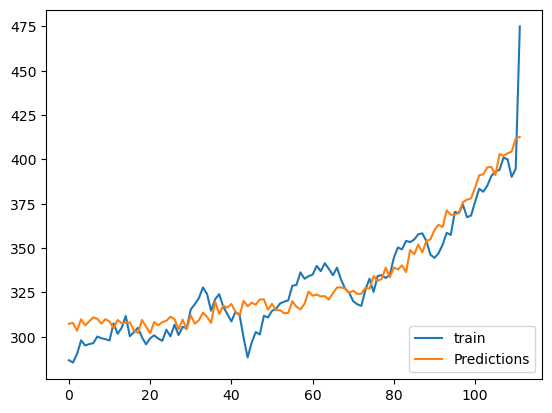

In [107]:
plt.figure()
plt.plot(datax['Close'][101:213].values)
plt.plot(valid[['predictions']])
plt.legend(['train', 'Predictions'], loc='lower right')
plt.show()

In [108]:
error_main = np.sqrt(np.abs(datax['Close'][101:213].values -valid[['predictions']].values))
print(error_main)

[[ 4.53860529  4.67428476  4.13387569 ...  9.0989602   9.35045779
  12.94762728]
 [ 4.58681582  4.72110997  4.18674929 ...  9.07475263  9.32690299
  12.93062685]
 [ 4.08793495  4.23806703  3.63334589 ...  9.31014514  9.55608637
  13.09689956]
 ...
 [10.85004377 10.90749512 10.68706882 ...  3.78595233  3.11343073
   8.39741273]
 [11.17797037 11.23374477 11.01984627 ...  4.64295238  4.11303084
   7.95568782]
 [11.22342646 11.27897608 11.06595191 ...  4.7513458   4.23500918
   7.89143135]]


In [109]:
final_pred

array([307.34893799, 307.78887939, 303.46121216, 309.88916016,
       306.43530273, 308.73379517, 310.92825317, 310.14608765,
       307.40002441, 309.94281006, 308.60549927, 304.88980103,
       309.46060181, 307.68371582, 307.86425781, 308.13171387,
       303.59112549, 302.16009521, 309.5012207 , 305.72732544,
       302.00210571, 308.24789429, 306.43838501, 308.28173828,
       308.9772644 , 311.30831909, 309.98883057, 304.16329956,
       309.68798828, 304.15301514, 312.10037231, 307.38327026,
       309.349823  , 313.59460449, 311.23510742, 307.84350586,
       319.86474609, 312.8822937 , 317.52243042, 316.41955566,
       318.48831177, 314.04537964, 311.86801147, 320.26089478,
       317.2416687 , 319.17349243, 318.10250854, 321.0123291 ,
       321.08184814, 315.21923828, 318.51376343, 314.97341919,
       314.9770813 , 313.27694702, 313.4576416 , 320.0319519 ,
       316.95236206, 315.44064331, 318.64807129, 325.51815796,
       323.20852661, 323.76171875, 322.74121094, 322.92